# Sentimental Analysis of Text Data: EDA

Steps:
1. Data Cleaning and Pre Processing
2. Tokenisation and Feature Extraction
2. EDA and Data Visualization


EDA includes:
1. Donut Graph for the Negative and Neutral sentiment distribution
2. Bar Graph and Box Plot for number of tokens
3. Most Frequently used words
4. Most Frequently used words for each Sentiment
5. WordCloud for each sentiment

In [1]:
import string
import math
import pandas as pd
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

In [2]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('sentiments.csv',
                   header=None,
                   names=['textID', 'text', 'sentiment'])

# Printing out first 5 columns
df.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     18899 non-null  object
 1   text       18898 non-null  object
 2   sentiment  18899 non-null  object
dtypes: object(3)
memory usage: 443.1+ KB


In [4]:
df.isnull().sum().head() 

textID       0
text         1
sentiment    0
dtype: int64

In [5]:
df['sentiment'].value_counts()

neutral     11118
negative     7781
Name: sentiment, dtype: int64

In [6]:
df1 = df.dropna()
df1.isnull().sum().head()

textID       0
text         0
sentiment    0
dtype: int64

In [7]:
df1['text'].unique()

array(['that`s enough! I`ll do nothing for 2 hours.',
       "I have to go clothes shopping tomorrow  I hate it, but I have a serious 'clothes falling apart' situation here.",
       'i am bored. :| any idea`s of a nice site?', ...,
       'Last night in Australia', 'painting',
       'Is in bed not able to sleep  bloody bipolar!'], dtype=object)

# Pre Processing

In [8]:
def tokenise(text):
    words = word_tokenize(text) 
    return words

In [9]:
# Dictionary of English Contractions
import re
pd.options.mode.chained_assignment = None  # default='warn'

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df1['text']=df1['text'].apply(lambda x:expand_contractions(x))

In [10]:
df1['cleaned']=df1['text'].apply(lambda x: x.lower())

In [11]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [12]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [13]:
# Removing extra spaces
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [14]:
for index,text in enumerate(df1['cleaned'][35:40]):
  print('text %d:\n'%(index+1),text)

text 1:
 my mom wants to lay well be there later probably a little after and im sorry youre sick
text 2:
 sometimes knowledge is not a good thing httpdiggcom
text 3:
  me and my moms cars were broken into i feel violated
text 4:
 we are going all out
text 5:
 m do it up


In [15]:
# Changing 'negative' to 0 and 'neutral' to 1
df1['sentiment'] = df1.sentiment.map({'negative':0, 'neutral':1})

# Get an idea of the size of the dataset
print(df1.shape)

# Previewing
df1.head()

(18898, 4)


,textID,text,sentiment,cleaned
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,1,thats enough ill do nothing for hours
1,f358968122,I have to go clothes shopping tomorrow I hate...,0,i have to go clothes shopping tomorrow i hate ...
2,449e7733f1,i am bored. :| any idea`s of a nice site?,1,i am bored any ideas of a nice site
3,6099baf6e8,I don`t think will want to come back (guys r...,0,i dont think will want to come back guys read ...
4,f946da7a04,_thomas if only the drinking game was tonight....,1,thomas if only the drinking game was tonighti ...


In [16]:
df1= df1.drop(['textID', 'text'], axis=1)


In [17]:
df1.head()

,sentiment,cleaned
0,1,thats enough ill do nothing for hours
1,0,i have to go clothes shopping tomorrow i hate ...
2,1,i am bored any ideas of a nice site
3,0,i dont think will want to come back guys read ...
4,1,thomas if only the drinking game was tonighti ...


# EDA and Data Visualization:

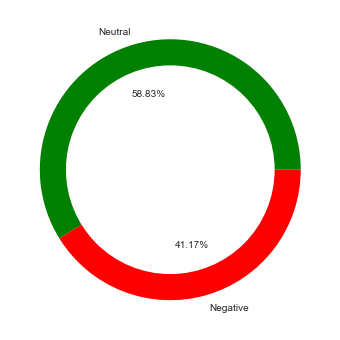

In [50]:
# Visualising distribution of observations among categories

import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

# Setting to use seaborn style for plots
matplotlib.style.use("seaborn")

plt.figure(figsize=(6, 6))

# Creates pie chart
plt.pie(
    df1["sentiment"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Neutral", "Negative"],
    colors = ["green", "red"]
)

# Creates circle
circle = plt.Circle((0,0), 0.80,fc='white')
# Adds circle object to the existing figure (pie chart)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

[Text(0.5, 0, '( Number of Tokens )'),
 Text(0, 0.5, '( Number of Observations )')]

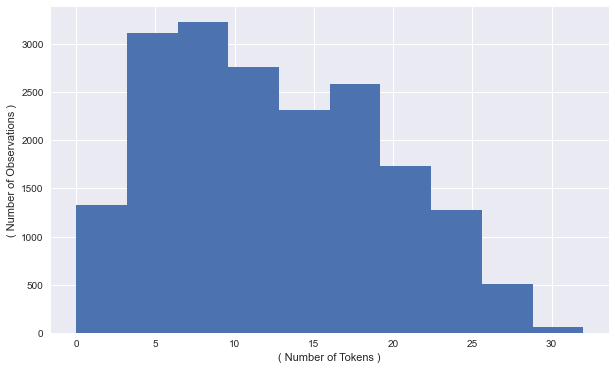

In [19]:
# Plotting histogram for number of tokens in each observation
ax1 = df1.cleaned.str.split().map(lambda x: len(x)).hist(figsize=(10, 6))
ax1.set(xlabel="( Number of Tokens )", ylabel="( Number of Observations )")

Text(0, 0.5, '( Number of Tokens )')

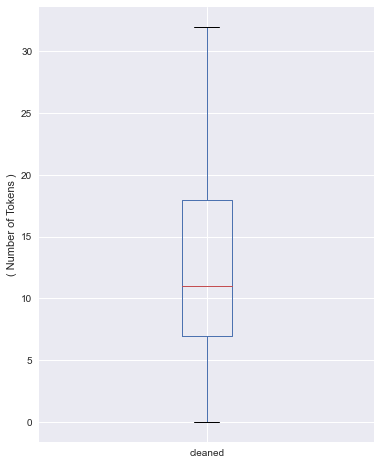

In [20]:
# Plotting boxplot for number of tokens in each observation
ax2 = df1.cleaned.str.split().map(lambda x: len(x)).plot.box(figsize=(6,8))
ax2.set_ylabel("( Number of Tokens )")

In [21]:
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

In [22]:
df1['cleaned']=df1['cleaned'].apply(lambda x: remove_stopword(x))

In [23]:
df1.head()

,sentiment,cleaned
0,1,thats enough ill nothing hours
1,0,go clothes shopping tomorrow hate serious clot...
2,1,bored ideas nice site
3,0,dont think want come back guys read dms
4,1,thomas drinking game tonighti dont work till t...


# Tokenisation 

In [24]:
import nltk

df1['cleaned'] = df1.apply(lambda row: nltk.word_tokenize(row['cleaned']), axis=1)

In [25]:
df1.head()

,sentiment,cleaned
0,1,"[thats, enough, ill, nothing, hours]"
1,0,"[go, clothes, shopping, tomorrow, hate, seriou..."
2,1,"[bored, ideas, nice, site]"
3,0,"[dont, think, want, come, back, guys, read, dms]"
4,1,"[thomas, drinking, game, tonighti, dont, work,..."


# Finding frequency of most commonly used words

In [26]:
top = Counter([item for sublist in df1['cleaned'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,im,2282
1,get,1059
2,go,977
3,dont,959
4,like,933
5,got,882
6,work,863
7,day,823
8,going,813
9,cant,810


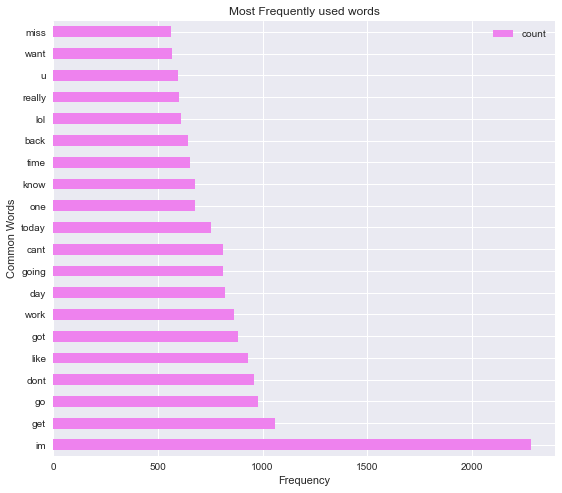

In [48]:
temp.plot(x="Common_words", y=["count"], kind="barh", figsize=(9, 8), color='violet')


# naming the y-axis
plt.ylabel('Common Words')
plt.xlabel('Frequency')
# plot title
plt.title('Most Frequently used words')
 
# print bar graph
plt.show()

In [28]:
Neutral_sent = df1[df1['sentiment']==1]
Negative_sent = df1[df1['sentiment']==0]




print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

Number of tweets with negative sentiment 7781
Number of tweets with neutral sentiment 11117


# Finding frequency of commonly used words in Neutral Sentiment

In [30]:
top_neutral = Counter([item for sublist in Neutral_sent['cleaned'] for item in sublist])
temp1 = pd.DataFrame(top_neutral.most_common(20))
temp1.columns = ['Common_words','count']
temp1.style.background_gradient(cmap='Greens')

,Common_words,count
0,im,1057
1,get,623
2,go,576
3,got,528
4,day,505
5,dont,491
6,going,479
7,work,477
8,like,457
9,lol,454


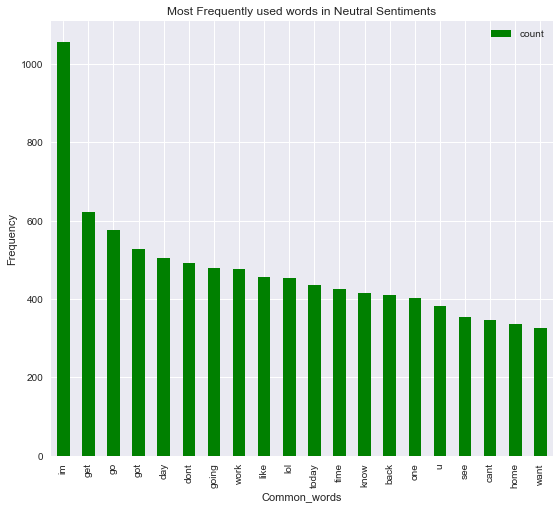

In [52]:
temp1.plot(x="Common_words", y=["count"], kind="bar", figsize=(9, 8), color='green')


# naming the y-axis
plt.ylabel('Frequency')
# plot title
plt.title('Most Frequently used words in Neutral Sentiments')
 
# print bar graph
plt.show()

# Finding frequency of commonly used words in Negative Sentiment

In [31]:
top_negative = Counter([item for sublist in Negative_sent['cleaned'] for item in sublist])
temp2 = pd.DataFrame(top_negative.most_common(20))
temp2.columns = ['Common_words','count']
temp2.style.background_gradient(cmap='Reds')

,Common_words,count
0,im,1225
1,like,476
2,dont,468
3,cant,464
4,get,436
5,miss,422
6,go,401
7,sad,389
8,work,386
9,got,354


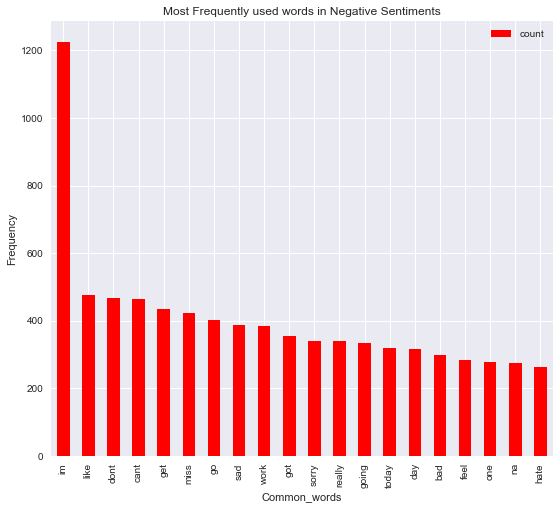

In [51]:
temp2.plot(x="Common_words", y=["count"], kind="bar", figsize=(9, 8), color='red')


# naming the y-axis
plt.ylabel('Frequency')
# plot title
plt.title('Most Frequently used words in Negative Sentiments')
 
# print bar graph
plt.show()

# Plotting WordClouds for both sentiments

In [34]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

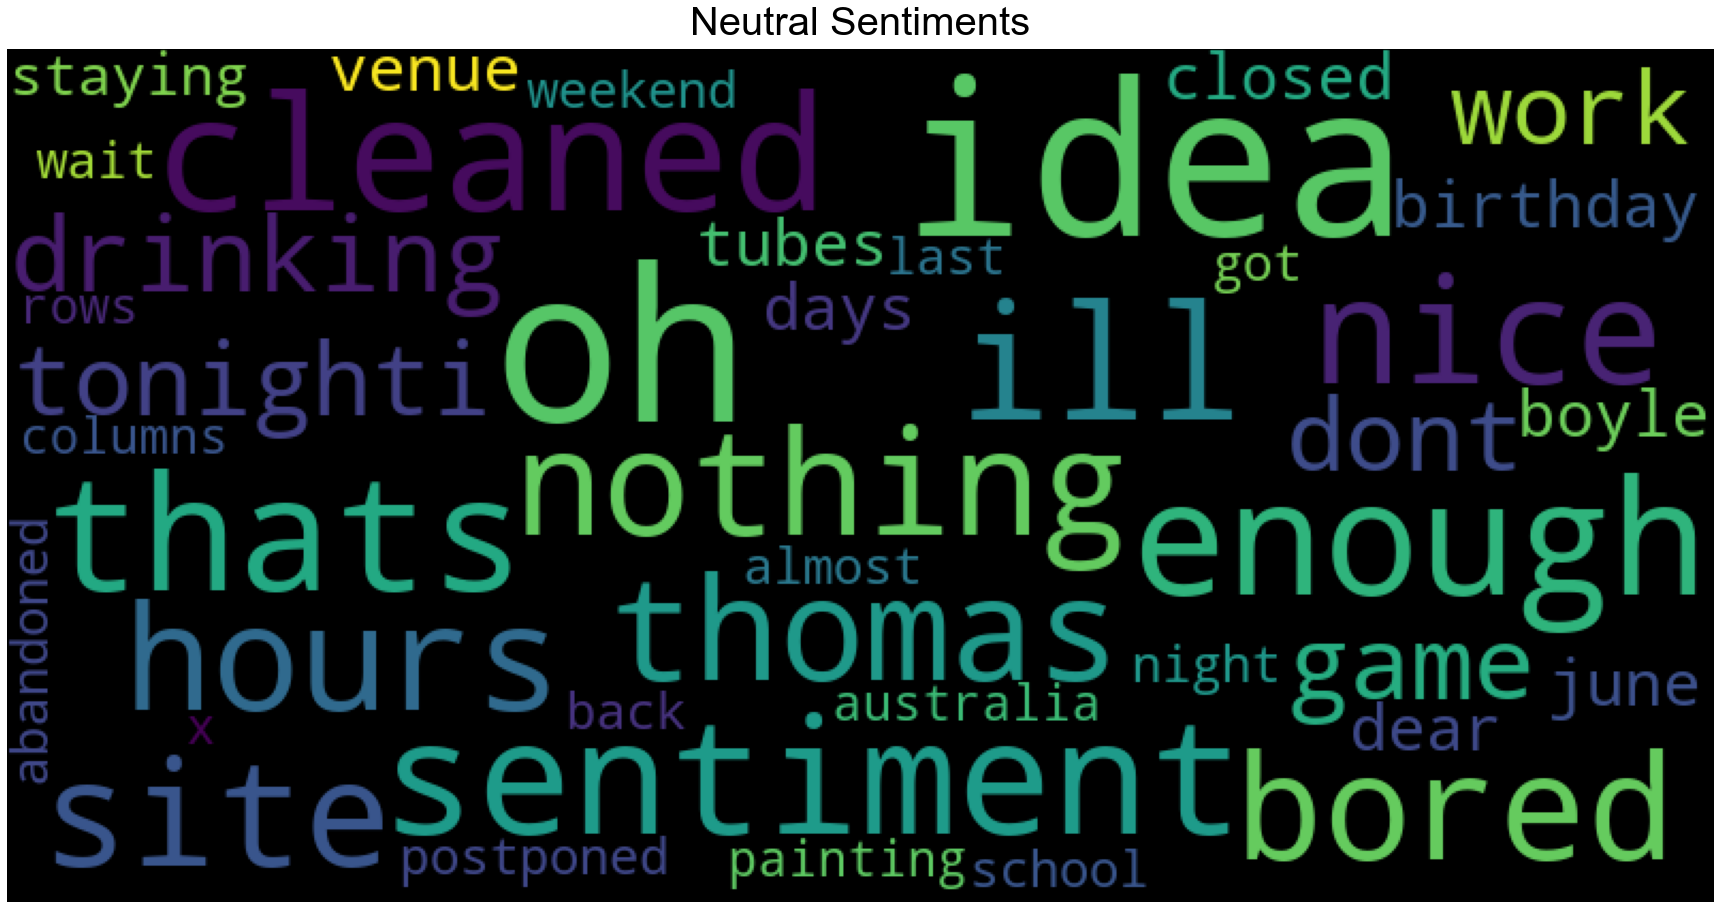

In [36]:
plot_wordcloud(Neutral_sent,title = 'Neutral Sentiments')

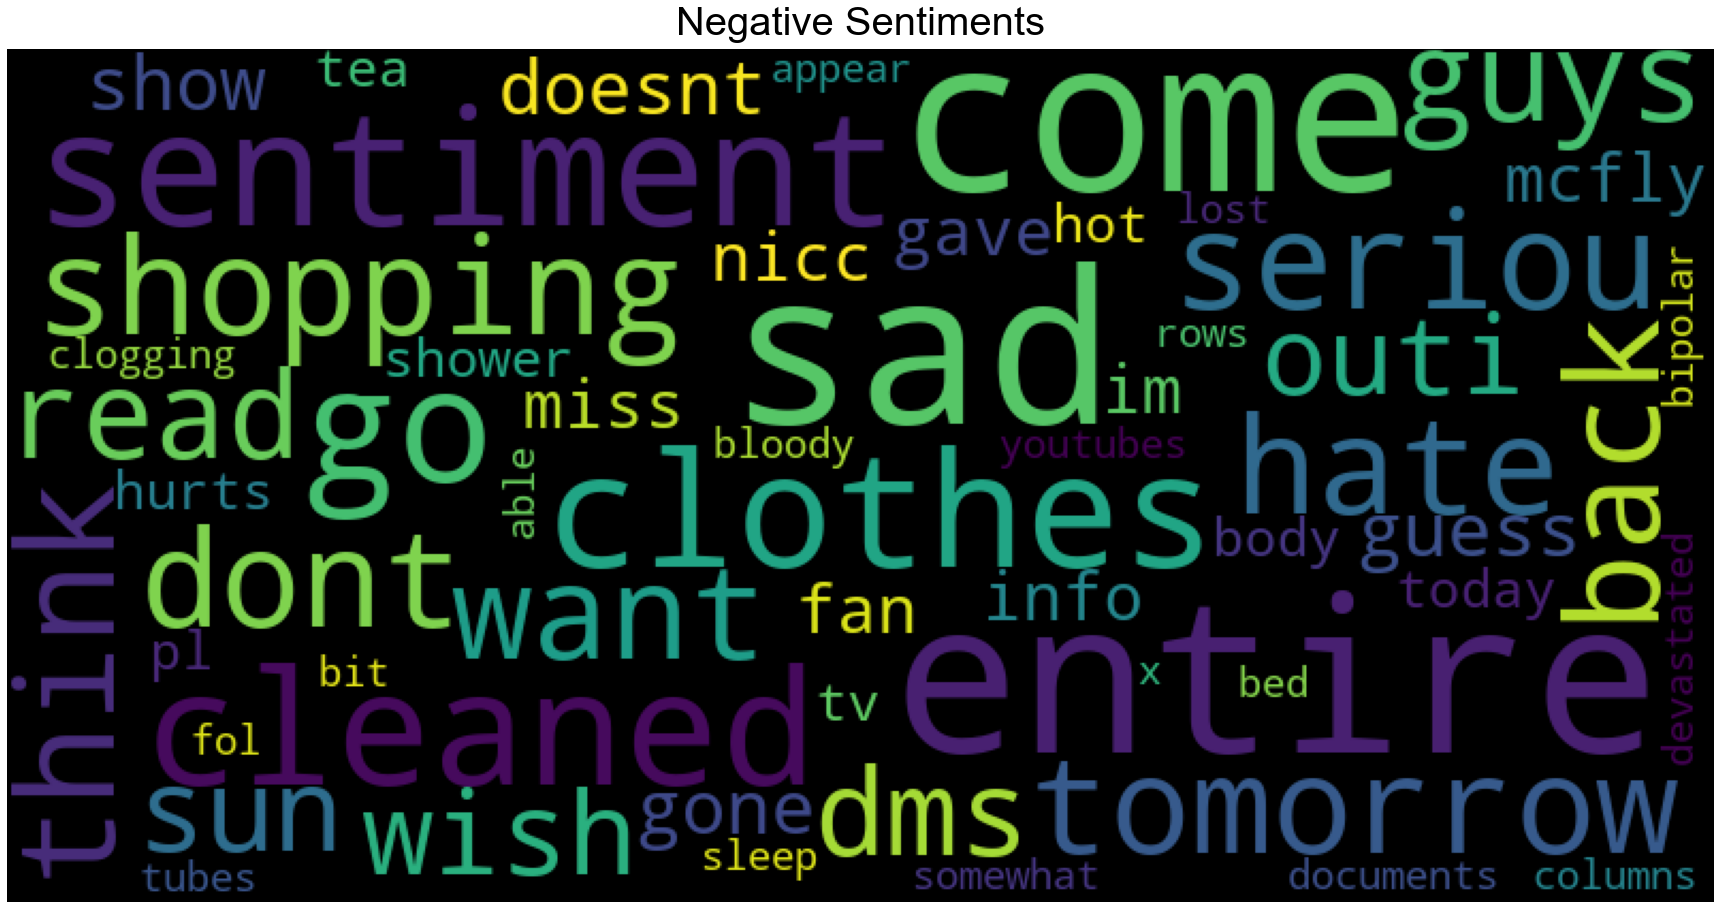

In [37]:
plot_wordcloud(Negative_sent,title = 'Negative Sentiments')